# Section 4.Neural Network Modeling

### _Objective_
1. Deep Neural Network 을 Tensorflow 을 이용해 구현합니다. 


In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

## 문제 1. 그래프 근사시키기
* Tensorflow 을 이용해 아래의 그래프를 근사화 해 보세요.<br>

$$
f(x) = \frac{x}{2} * (sin(32x+0.5) * cos(24x-0.5) + sin(-3x+0.3))
$$

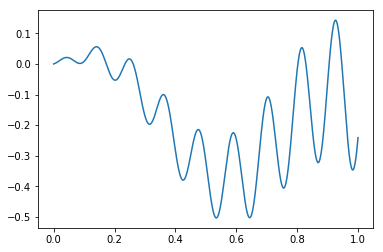

In [3]:
# 우선 실행해 주세요
func = lambda x : x*(np.sin(32*x+0.5)*np.cos(24*x-0.5)+np.sin(-3*x+0.3))/2

xs = np.linspace(0,1,1000)
ys = func(xs)

plt.plot(xs,ys)
plt.show()

In [0]:
#### 답안지 입력란
# * 아래에 답을 서술하여 주세요
# * `graph` 아래에 Node들을 구성해 주세요.
# * 주요 Node의 이름은 아래로 통일시켜 주세요.
#     * 입력 노드 : `x`, shape = (None,1)
#     * y label 노드 : `y_true`, shape = (None,1)
#     * 출력 노드 : `y_pred`, shape = (None, 1)
# 

In [0]:
graph = tf.Graph()
with graph.as_default():
    # Graph 구성하기
    with tf.name_scope('input_layer') :
        x = tf.placeholder(tf.float32, shape=(None,1), name='x')
        y_true = tf.placeholder(tf.float32, shape=(None,1), name="y_true")
        lr = tf.constant(0.01, tf.float32)
        
    with tf.name_scope('hidden_layer1') :
        n_in = int(x.get_shape()[-1]) # 변하지 않는 shape(정적 shape)
        n_out = 128        
        weights1 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias1 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        layer1 = tf.matmul(x, weights1) + bias1 # (None, 1) * ( 1, 128)
        a1 = tf.nn.relu(layer1)

    with tf.name_scope('hidden_layer2') :
        n_in = int(a1.get_shape()[-1])
        n_out = 128        
        weights2 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias2 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        layer2 = tf.matmul(a1, weights2) + bias2
        a2 = tf.nn.relu(layer2)
        
    with tf.name_scope('hidden_layer3') :
        n_in = int(a2.get_shape()[-1])
        n_out = 128        
        weights3 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias3 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        layer3 = tf.matmul(a2, weights3) + bias3
        a3 = tf.nn.relu(layer3)
        
    with tf.name_scope('hidden_layer4') :
        n_in = int(a3.get_shape()[-1])
        n_out = 128        
        weights4 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias4 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        layer4 = tf.matmul(a3, weights4) + bias4
        a4 = tf.nn.relu(layer4)

    with tf.name_scope('hidden_layer5') :
        n_in = int(a4.get_shape()[-1])
        n_out = 128        
        weights5 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias5 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        layer5 = tf.matmul(a4, weights5) + bias5
        a5 = tf.nn.relu(layer5)
        
    with tf.name_scope('hidden_layer6') :
        n_in = int(a4.get_shape()[-1])
        n_out = 128        
        weights6 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias6 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        layer6 = tf.matmul(a5, weights6) + bias6
        a6 = tf.nn.relu(layer6)
        
    with tf.name_scope('output_layer') :
        n_in = int(a5.get_shape()[-1])
        n_out = 1
        weights7 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_in, n_out)), dtype=tf.float32, name='weights' )
        bias7 = tf.Variable( np.random.normal(loc=0.0, scale=0.1, size=(n_out)), dtype=tf.float32, name='bias' )
        y_pred = tf.matmul(a6, weights7) + bias7 # shape = (?, 1)
        y_pred = tf.identity(y_pred, name="y_pred")    # 이게 다른 name_scope에 있어서 tensorflow가 뭘찾을지 몰라서 헷갈린듯....;
               
    with tf.name_scope('loss_layer') :
        mse = tf.sqrt(tf.reduce_mean((y_pred - y_true)**2, axis=0))
        tf.add_to_collection(tf.GraphKeys.LOSSES, mse)
        
    train_op = tf.train.AdamOptimizer(lr).minimize(mse)


#### 아래의 코드로 학습시켜 주세요 . 

#### 정답 확인
* 아래와 동일하게 나오는지 확인해 주세요
* 학습시킨 모델이 아래의 기준지표(RMSE<0.01)이 될 수 있도록 학습시켜주세요

100%|██████████| 20000/20000 [00:37<00:00, 529.74it/s]


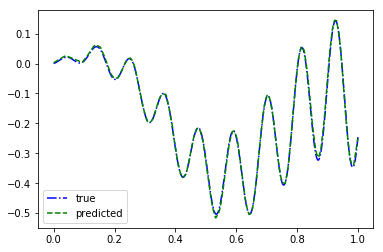

rmse :  0.005688791178201083
정답입니다.


In [11]:
# 아래의 코드를 실행시켰을 때, RMSE가 0.01미만으로 나오도록 학습시켜 주세요
# 모델은 아래와 같이 학습시킬 수 있습니다.
# 총 20000 Epoch을 학습시키도록 하겠습니다.
tf.reset_default_graph()
with graph.as_default():
     
    x = graph.get_tensor_by_name('input_layer/x:0')
    y = graph.get_tensor_by_name('input_layer/y_true:0')
    y_pred = graph.get_tensor_by_name('output_layer/y_pred:0')
    loss = graph.get_collection(tf.GraphKeys.LOSSES)[0]
    train_op = graph.get_collection(tf.GraphKeys.TRAIN_OP)[0]


    sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())

    for epoch in tqdm(range(20000)):
         sess.run(train_op, feed_dict={
             x : xs.reshape(-1,1),  # Broad Casting 방지용 reshape임.
             y_true : ys.reshape(-1,1)})
            
    
    ys_pred = sess.run(y_pred, feed_dict={
        x : xs.reshape(-1,1),
        y_true : ys.reshape(-1,1)
    })
    
    plt.plot(xs, ys, 'b-.')
    plt.plot(xs, ys_pred, 'g--')
    plt.legend(['true','predicted'])
    plt.show()
    rmse = np.sqrt(np.mean((ys_pred-ys.reshape(-1,1))**2))
    print("rmse : ", rmse)
          
    assert rmse < 0.01, "root-mean-squared-error값이 0.01미만으로 나오도록 해주세요"
    print("정답입니다.")

#  

<hr>
<div style = "background-image: url('https://algorithmai.io/static/media/logo.665798c4.png');background-repeat: no-repeat; background-position: right; background-size: 220px 40px; padding : 5px 10px 5px 5px;">
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/17
</div>
<hr>